In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"H:\Dataset\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3030,1761-AEZZR,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.55,79.55,Yes


In [3]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [6]:
pd.to_numeric(df.TotalCharges,errors="coerce")

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [7]:
df[pd.to_numeric(df.TotalCharges,errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df.iloc[488]['TotalCharges']

' '

In [9]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [10]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
df1.TotalCharges.dtypes

dtype('float64')

(array([[ 877.,  259.,  159.,  114.,  102.,   98.,   72.,   70.,   46.,
           72.],
        [ 847.,  476.,  402.,  424.,  371.,  346.,  380.,  425.,  455.,
         1037.]]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 2 BarContainer objects>)

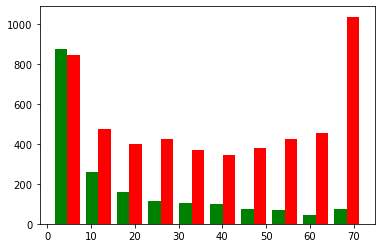

In [12]:
tnure_churn_no = df1[df1.Churn=="No"].tenure
tnure_churn_yes = df1[df1.Churn=="Yes"].tenure

plt.hist([tnure_churn_yes, tnure_churn_no], color=["green","red"],label=["ChurnYes","churnNO"])

In [13]:
for col in df:
    if df1[col].dtypes=="object":
        print(f"{col} : {df1[col].unique()}")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [14]:
df1.replace("No internet service",'No',inplace=True)
df1.replace("No phone service","No",inplace=True)
for col in df:
    if df1[col].dtypes=="object":
        print(f"{col} : {df1[col].unique()}")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [15]:
yes_no_columns = ["Partner","Dependents","MultipleLines","PhoneService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]

In [16]:
for col in yes_no_columns:
    df1[col].replace({'Yes' :1,"No" : 0},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [17]:
for col in df:
    
    print(f"{col} : {df1[col].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [18]:
df1["gender"].replace({"Female":1,"Male":0},inplace=True)

In [19]:
df1["gender"].unique()

array([1, 0], dtype=int64)

In [20]:
df2 = pd.get_dummies(data=df1,columns=["InternetService","Contract","PaymentMethod"])

In [21]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [22]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [23]:
cols_to_scale = ["tenure","MonthlyCharges","TotalCharges"]

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [25]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2634,0,0,1,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4540,0,0,0,0,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
376,0,0,0,0,0.000000,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
5789,1,0,0,0,0.338028,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
433,0,0,0,0,0.154930,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0


In [26]:
X = df2.drop("Churn",axis="columns")
y = df2["Churn"]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)

In [28]:
X_train.shape

(5625, 26)

In [29]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam",
             loss="binary_crossentropy",
            metrics=["accuracy"])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 970us/step - loss: 0.4927 - accuracy: 0.7607
Epoch 2/100
176/176 [==============================] - 0s 984us/step - loss: 0.4271 - accuracy: 0.7964
Epoch 3/100
176/176 [==============================] - 0s 958us/step - loss: 0.4198 - accuracy: 0.8018
Epoch 4/100
176/176 [==============================] - 0s 943us/step - loss: 0.4168 - accuracy: 0.8032
Epoch 5/100
176/176 [==============================] - 0s 965us/step - loss: 0.4147 - accuracy: 0.8043
Epoch 6/100
176/176 [==============================] - 0s 980us/step - loss: 0.4145 - accuracy: 0.8036
Epoch 7/100
176/176 [==============================] - 0s 949us/step - loss: 0.4126 - accuracy: 0.8075
Epoch 8/100
176/176 [==============================] - 0s 942us/step - loss: 0.4118 - accuracy: 0.8068
Epoch 9/100
176/176 [==============================] - 0s 991us/step - loss: 0.4107 - accuracy: 0.8073
Epoch 10/100
176/176 [==============================] - 0s 962us/step - l

176/176 [==============================] - 0s 896us/step - loss: 0.3884 - accuracy: 0.8197
Epoch 80/100
176/176 [==============================] - 0s 936us/step - loss: 0.3887 - accuracy: 0.8206
Epoch 81/100
176/176 [==============================] - 0s 908us/step - loss: 0.3884 - accuracy: 0.8196
Epoch 82/100
176/176 [==============================] - 0s 917us/step - loss: 0.3872 - accuracy: 0.8197
Epoch 83/100
176/176 [==============================] - 0s 910us/step - loss: 0.3881 - accuracy: 0.8190
Epoch 84/100
176/176 [==============================] - 0s 935us/step - loss: 0.3876 - accuracy: 0.8222
Epoch 85/100
176/176 [==============================] - 0s 930us/step - loss: 0.3873 - accuracy: 0.8178
Epoch 86/100
176/176 [==============================] - 0s 934us/step - loss: 0.3868 - accuracy: 0.8183
Epoch 87/100
176/176 [==============================] - 0s 907us/step - loss: 0.3872 - accuracy: 0.8190
Epoch 88/100
176/176 [==============================] - 0s 933us/step - loss:

In [30]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 787us/step - loss: 0.4445 - accuracy: 0.7882


[0.4445262551307678, 0.7882018685340881]

In [31]:
yp = model.predict(X_test)
yp[:5]

array([[0.26882714],
       [0.58798164],
       [0.01288527],
       [0.80331886],
       [0.58307934]], dtype=float32)

In [32]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [33]:
y_pred =[]
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [34]:
y_pred[:5]

[0, 1, 0, 1, 1]

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       999
           1       0.65      0.57      0.61       408

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(69.0, 0.5, 'truth')

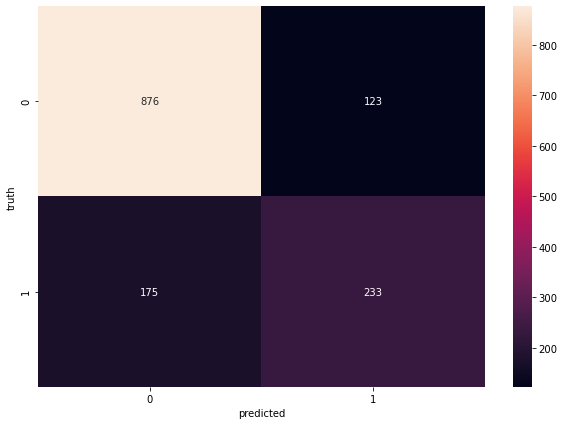

In [36]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize =(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("predicted")
plt.ylabel("truth")

# Handling imbalanced dataset

In [37]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim = 26, activation = "relu"),
        keras.layers.Dense(15, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
    ])
    
    model.compile(optimizer = "adam", loss=loss, metrics=["accuracy"])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train,y_train,epochs=100,class_weights=weights)
        
    print(model.evaluate(X_test,y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test,y_preds))
    
    return y_preds


In [39]:
y_preds = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy",-1)

Epoch 1/100
176/176 [==============================] - 0s 959us/step - loss: 0.5450 - accuracy: 0.7047
Epoch 2/100
176/176 [==============================] - 0s 983us/step - loss: 0.4320 - accuracy: 0.7929
Epoch 3/100
176/176 [==============================] - 0s 965us/step - loss: 0.4198 - accuracy: 0.8016
Epoch 4/100
176/176 [==============================] - 0s 986us/step - loss: 0.4152 - accuracy: 0.8034
Epoch 5/100
176/176 [==============================] - 0s 983us/step - loss: 0.4125 - accuracy: 0.8066
Epoch 6/100
176/176 [==============================] - 0s 976us/step - loss: 0.4104 - accuracy: 0.8066
Epoch 7/100
176/176 [==============================] - 0s 965us/step - loss: 0.4081 - accuracy: 0.8096
Epoch 8/100
176/176 [==============================] - 0s 977us/step - loss: 0.4064 - accuracy: 0.8073
Epoch 9/100
176/176 [==============================] - 0s 979us/step - loss: 0.4046 - accuracy: 0.8112
Epoch 10/100
176/176 [==============================] - 0s 975us/step - l

176/176 [==============================] - 0s 1ms/step - loss: 0.3552 - accuracy: 0.8302
Epoch 81/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3563 - accuracy: 0.8325
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3540 - accuracy: 0.8359
Epoch 83/100
176/176 [==============================] - 0s 974us/step - loss: 0.3546 - accuracy: 0.8343
Epoch 84/100
176/176 [==============================] - 0s 987us/step - loss: 0.3535 - accuracy: 0.8382
Epoch 85/100
176/176 [==============================] - 0s 966us/step - loss: 0.3552 - accuracy: 0.8347
Epoch 86/100
176/176 [==============================] - 0s 961us/step - loss: 0.3532 - accuracy: 0.8382
Epoch 87/100
176/176 [==============================] - 0s 983us/step - loss: 0.3524 - accuracy: 0.8348
Epoch 88/100
176/176 [==============================] - 0s 961us/step - loss: 0.3529 - accuracy: 0.8352
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3514 

# 1 Undersampling

In [40]:
count_class_0, count_class_1 = df1.Churn.value_counts()

df_class_0 = df2[df2["Churn"] == 0]
df_class_1 = df2[df2["Churn"] == 1]

In [41]:
df_class_0.shape

(5163, 27)

In [42]:
df_class_1.shape

(1869, 27)

In [43]:
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print("Random under-sampling: ")
print(df_test_under.Churn.value_counts())

Random under-sampling: 
0    1869
1    1869
Name: Churn, dtype: int64


In [44]:
X = df_test_under.drop('Churn', axis = 1)
y = df_test_under["Churn"]

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15, stratify=y)

In [46]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [47]:
y_preds = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/100
94/94 [==============================] - 0s 966us/step - loss: 0.5883 - accuracy: 0.7177
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5197 - accuracy: 0.7478
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5005 - accuracy: 0.7659
Epoch 4/100
94/94 [==============================] - 0s 992us/step - loss: 0.4921 - accuracy: 0.7669
Epoch 5/100
94/94 [==============================] - 0s 966us/step - loss: 0.4875 - accuracy: 0.7692
Epoch 6/100
94/94 [==============================] - 0s 985us/step - loss: 0.4858 - accuracy: 0.7632
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4809 - accuracy: 0.7676
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4782 - accuracy: 0.7686
Epoch 9/100
94/94 [==============================] - 0s 991us/step - loss: 0.4773 - accuracy: 0.7719
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4753 - accuracy: 0.7732

94/94 [==============================] - 0s 998us/step - loss: 0.3998 - accuracy: 0.8130
Epoch 82/100
94/94 [==============================] - 0s 961us/step - loss: 0.3977 - accuracy: 0.8120
Epoch 83/100
94/94 [==============================] - 0s 998us/step - loss: 0.3957 - accuracy: 0.8124
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3956 - accuracy: 0.8151
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3968 - accuracy: 0.8120
Epoch 86/100
94/94 [==============================] - 0s 988us/step - loss: 0.3948 - accuracy: 0.8167
Epoch 87/100
94/94 [==============================] - ETA: 0s - loss: 0.3744 - accuracy: 0.82 - 0s 1ms/step - loss: 0.3929 - accuracy: 0.8154
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3938 - accuracy: 0.8137
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3919 - accuracy: 0.8157
Epoch 90/100
94/94 [==============================] - 0s 1ms/st

# 2. Oversampling

In [48]:
count_class_0, count_class_1

(5163, 1869)

In [49]:
df_class_1_over = df_class_1.sample(count_class_0, replace = True)

df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print("Random over-sampling")
print(df_test_over.Churn.value_counts())

Random over-sampling
0    5163
1    5163
Name: Churn, dtype: int64


In [50]:
X = df_test_over.drop("Churn", axis = 1)
y  = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test  = train_test_split(X,y, test_size=0.2, random_state = 15, stratify = y)

In [51]:
y_test.value_counts()

0    1033
1    1033
Name: Churn, dtype: int64

In [52]:
y_preds = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1)

ValueError: Data cardinality is ambiguous:
  x sizes: 8260
  y sizes: 2066
Make sure all arrays contain the same number of samples.

# 3. SMOTE

In [53]:
X = df2.drop("Churn", axis = "columns")
y = df2["Churn"]

In [54]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [55]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [56]:
from imblearn.over_sampling import SMOTE

In [58]:
smote = SMOTE(sampling_strategy="minority")
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state=15, stratify=y_sm)

In [62]:
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [63]:
y_test.value_counts()

0    1033
1    1033
Name: Churn, dtype: int64

In [64]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 968us/step - loss: 0.5313 - accuracy: 0.7498
Epoch 2/100
259/259 [==============================] - 0s 963us/step - loss: 0.4682 - accuracy: 0.7793
Epoch 3/100
259/259 [==============================] - 0s 995us/step - loss: 0.4592 - accuracy: 0.78220s - loss: 0.4596 - accuracy: 0.78
Epoch 4/100
259/259 [==============================] - 0s 962us/step - loss: 0.4527 - accuracy: 0.78850s - loss: 0.4502 - accuracy: 
Epoch 5/100
259/259 [==============================] - ETA: 0s - loss: 0.4443 - accuracy: 0.79 - 0s 945us/step - loss: 0.4472 - accuracy: 0.7897
Epoch 6/100
259/259 [==============================] - 0s 985us/step - loss: 0.4435 - accuracy: 0.7931
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4396 - accuracy: 0.7970
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4366 - accuracy: 0.7965
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss:

259/259 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.8531: 0s - loss: 0.3378 - accuracy: 0.85
Epoch 80/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3397 - accuracy: 0.8538
Epoch 81/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.8545
Epoch 82/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3396 - accuracy: 0.8510
Epoch 83/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3397 - accuracy: 0.8506
Epoch 84/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8559: 0s - loss: 0.3327 - accuracy: 
Epoch 85/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.8521
Epoch 86/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3377 - accuracy: 0.8531
Epoch 87/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3368 - accuracy: 0.8553
Epoch 88/100
259/259 [=====

# 4. Use of Ensemble with undersampling

In [65]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [66]:
X = df2.drop("Churn",axis = 1)
y= df2["Churn"]

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [68]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [69]:
df3 = X_train.copy()
df3["Churn"] = y_train

In [70]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [71]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [72]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end],df_minority],axis=0)
    
    X_train = df_train.drop("Churn",axis=1)
    y_train = df_train.Churn
    
    return X_train, y_train

In [78]:
X_train, y_train = get_train_batch(df3_class0, df3_class1,0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy",-1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.5780 - accuracy: 0.7224
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.7589
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4913 - accuracy: 0.7615
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.7662
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4805 - accuracy: 0.7672
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7682
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.7699
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.7676
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4714 - accuracy: 0.7763
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.7722
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8084
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4033 - accuracy: 0.8117
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8124
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8110
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8134
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.8161
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8117
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8151
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8177
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.8090
Epoch 93/100


In [79]:
X_rain, y_train = get_train_batch(df3_class0, df3_class1, 1495,2990)

y_pred2= ANN(X_train, y_train, X_test, y_test, "binary_crossentropy",-1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6153 - accuracy: 0.6960
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5115 - accuracy: 0.7548
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4952 - accuracy: 0.7632
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.7656
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.7732
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.7689
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.7699
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.7732
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.7729
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.7779
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8144
Epoch 83/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8157
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8144
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8134
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3994 - accuracy: 0.8197
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8107
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.8164
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8110
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3994 - accuracy: 0.8120
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8177
Epoch 92/100


In [81]:
X_train, y_train = get_train_batch(df3_class0, df3_class1,2990,4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy",-1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6213 - accuracy: 0.6759
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5226 - accuracy: 0.7602
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4902 - accuracy: 0.7662
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.7685
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.7742
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7761
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4713 - accuracy: 0.7750
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.7799
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4659 - accuracy: 0.7787
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4626 - accuracy: 0.7860
Epoch 11/

83/83 [==============================] - 0s 2ms/step - loss: 0.3870 - accuracy: 0.8250
Epoch 84/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3870 - accuracy: 0.8269
Epoch 85/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8323
Epoch 86/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3848 - accuracy: 0.8304
Epoch 87/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3849 - accuracy: 0.8304
Epoch 88/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8323
Epoch 89/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3813 - accuracy: 0.8349
Epoch 90/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3802 - accuracy: 0.8315
Epoch 91/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3780 - accuracy: 0.8323
Epoch 92/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8311
Epoch 93/100


In [82]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [83]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.64      0.75      1033
           1       0.45      0.82      0.58       374

    accuracy                           0.69      1407
   macro avg       0.68      0.73      0.67      1407
weighted avg       0.79      0.69      0.70      1407

